# using multi layer perceptron on mnist dataset for digit classification.

### steps:
* importing the libraries
* loading the dataset
* preprocessing the data
* creating model architecture
* training the model
* testing the model on the test dataset

### first, we import the necessary packages

In [28]:
#importing liberaries
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler , EarlyStopping

####  loading the dataset using keras.datasets.mnist

In [29]:
from keras.datasets import mnist
#loading data
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

#### checking the shape of x_train, y_train , x_test, y_test

In [30]:
print("x_train shape : " + str(x_train.shape))
print("x_test shape : " + str(x_test.shape))
print("y_train shape : " + str(y_train.shape))
print("y_test shape : " + str(y_test.shape))

x_train shape : (60000, 28, 28)
x_test shape : (10000, 28, 28)
y_train shape : (60000,)
y_test shape : (10000,)


#### displaying 8 images of the training set using a for loop

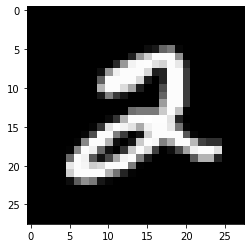

label is : 2


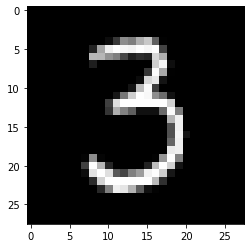

label is : 3


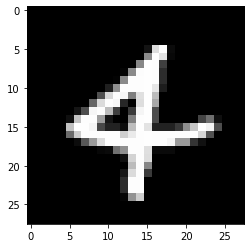

label is : 4


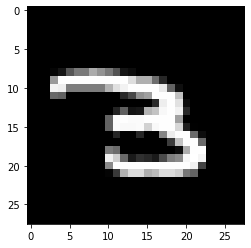

label is : 3


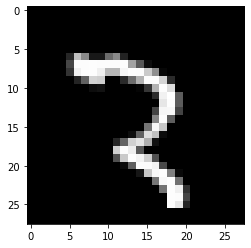

label is : 3


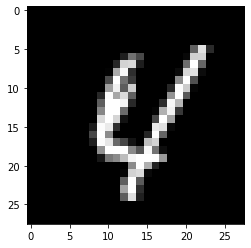

label is : 4


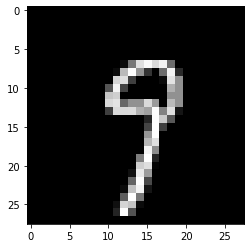

label is : 9


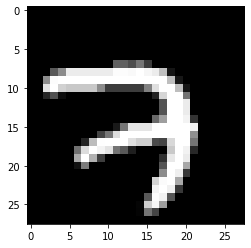

label is : 7


In [31]:
list1 = [5 , 50 , 150 , 250 , 500 , 700 , 1500, 5000]
for i in list1 : 
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()
    print("label is :", y_train[i])

#### we can see that all pictures have the same size, so we don't have to resize them

## preprocessing the data

#### normalize the pixel values to the range 0 and 1 by dividing each value by the maximum intensity of 255.

In [32]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

#### we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns which is called one hot-encoding. Each integer value is represented as a binary vector. All the values are zero,except one of them.

In [33]:
y_train = keras.utils.to_categorical(y_train , num_classes=10)
y_test = keras.utils.to_categorical(y_test , num_classes=10)
print("y_train shape : " + str(y_train.shape))
print("y_test shape : " + str(y_test.shape))

y_train shape : (60000, 10)
y_test shape : (10000, 10)


#### reshaping the data

In [34]:
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))
print("x_train shape : " + str(x_train.shape))
print("x_test shape : " + str(x_test.shape))

x_train shape : (60000, 784)
x_test shape : (10000, 784)


## model architecture (Using functional API)

In [35]:
in_put = layers.Input(shape=[784])
a1 = layers.Dense(512 , activation="relu" ,  kernel_initializer='random_uniform')(in_put)
a6 = layers.Dropout(0.4)(a1)
a2 = layers.Dense(264 , activation="relu" ,  kernel_initializer='random_uniform')(a6)
a5 = layers.Dropout(0.4)(a2)
a3 = layers.Dense(128 , activation="relu" ,  kernel_initializer='random_uniform')(a5)
a4 = layers.Dropout(0.4)(a3)
out_put = layers.Dense(10 , activation="softmax")(a4)
model = keras.Model(inputs=[in_put] , outputs=[out_put])

#### compiling the model.
#### since we had one target probability per class for each instance(one hot encoding) we use the "categorical_crossentropy" loss.
#### adam optimizer was chosen

In [36]:
model.compile(loss="categorical_crossentropy", 
             optimizer=keras.optimizers.Adam(learning_rate=0.001),
             metrics = ["accuracy"])

### we define two callback :
####    LearningRateScheduler
####    EarlyStopping

In [37]:
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    if epoch < 25:
        return 0.0005
    if epoch < 40:
        return 0.0001
learning_rate_scheduler = LearningRateScheduler(scheduler , verbose=1)

In [38]:
early_stopping = EarlyStopping(patience=15,
                              restore_best_weights=True)

#### fitting the model on the train dataset. 
###### 0.1 of the training set was chosen as the validation dataset

In [39]:
history = model.fit(x_train, y_train , 
                    epochs=100 ,
                    batch_size = 264,
                    callbacks=[early_stopping, learning_rate_scheduler],
                    validation_split=0.1)

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
205/205 [==============================] - 3s 11ms/step - loss: 0.5228 - accuracy: 0.8380 - val_loss: 0.1263 - val_accuracy: 0.9623
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
205/205 [==============================] - 2s 11ms/step - loss: 0.1854 - accuracy: 0.9459 - val_loss: 0.0969 - val_accuracy: 0.9722
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
205/205 [==============================] - 2s 9ms/step - loss: 0.1393 - accuracy: 0.9600 - val_loss: 0.0824 - val_accuracy: 0.9760
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.001.
205/205 [==============================] - 2s 9ms/step - loss: 0.1130 - accuracy: 0.9668 - val_loss: 0.0711 - val_accuracy: 0.9785
Epoch 5/100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.001.
205/205 [==============================] - 2s 9ms/step - loss: 0.0967

## Visualizing the Model Training History using the collected history data

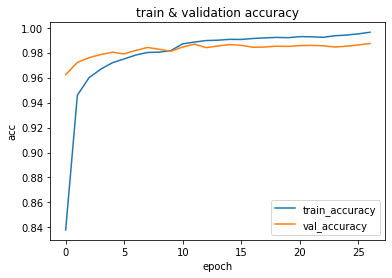

In [40]:
# accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("train & validation accuracy")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(["train_accuracy" , "val_accuracy"], loc="lower right")
plt.show()

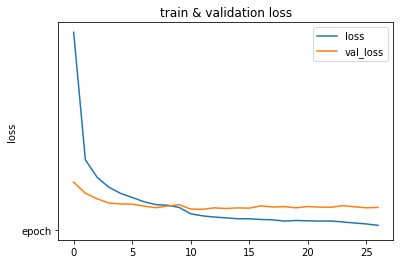

In [41]:
#loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("train & validation loss")
plt.ylabel("loss")
plt.plot("epoch")
plt.legend(["loss" , "val_loss"] , loc="upper right")
plt.show()

### how well the model does on the test set?

##### accuracy of the model performance on the test set

In [42]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0601 - accuracy: 0.9846


[0.06008635833859444, 0.9846000075340271]

#### we got more than 98 percent accuracy on the test set

### evaluating the model performance, using confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
import itertools

#### first we use the model to predict the test dataset

In [44]:
y_prediction  = model.predict(x_test)

#### we use np.argmax to Returns the indices of the maximum values along an axis.

In [45]:
argmax_prediction = np.argmax(y_prediction , axis=1)
argmax_y_test = np.argmax(y_test, axis=1)

#### We compare the predicted labels with the true labels in a confusion matrix.

In [46]:
confusion_mat = confusion_matrix(y_true=argmax_y_test , y_pred=argmax_prediction )

#### the code bellow is directly cpied from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [47]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 972    0    2    1    1    0    1    1    2    0]
 [   0 1129    1    1    0    1    2    0    1    0]
 [   2    2 1018    2    1    0    0    4    3    0]
 [   0    0    3  996    0    3    0    3    2    3]
 [   1    1    2    0  964    0    4    3    0    7]
 [   2    0    0    9    1  875    1    1    3    0]
 [   4    3    0    1    4    4  942    0    0    0]
 [   1    1    5    1    0    0    0 1016    1    3]
 [   1    0    2    5    4    4    0    2  953    3]
 [   2    3    0    5   11    2    0    3    2  981]]


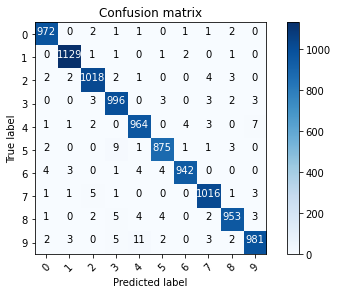

In [48]:
plot_confusion_matrix(cm=confusion_mat, classes=["0","1","2","3","4","5","6","7","8","9"])

#### The number of correct and incorrect predictions are summarized with count values and broken down by each class.

#### saving the model
 This will save the model’s

* Model Architecture
* Model Weights
* Model optimizer state

In [49]:
model.save('myModel.h5')